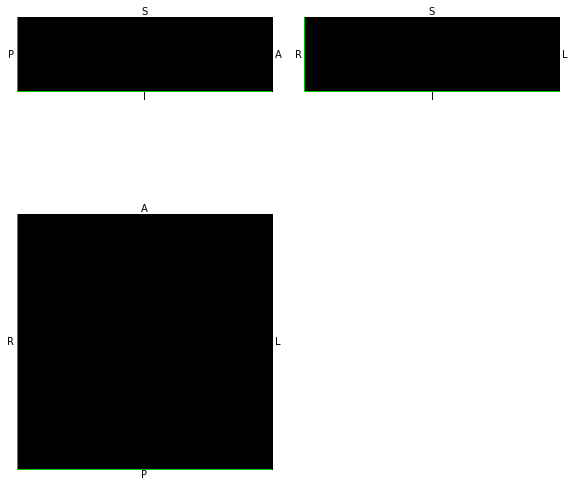

In [2]:
import numpy as np
import nibabel as nib

img = nib.load("D:/niftyfolder/SABR5__/SABR5__registered_OARsfullscan2.nii")
nib.viewers.OrthoSlicer3D(img.get_data()).show()